![Workout image](gym.png)

You are a product manager for a fitness studio based in Singapore and are interested in understanding the types of digital products you should offer. You plan to conduct a market analysis in Python to understand how to place your digital fitness products in the regional market. A market analysis will allow you to identify strengths of your competitors, gauge demand, and create unique new digital products and services for potential users.

You are provided with a number of CSV files in the Files-"data" folder, which offer international data on Google Trends and YouTube keyword searches related to fitness and related products. Two helper functions have also been provided, `read_file` and `read_geo`, to help you process and visualize these CSV files for further analysis.

You'll use `pandas` methods to explore this data and drive your product management insights. 

You can continue beyond the bounds of this project and also investigate in-person classes, local gyms, and online personal instructors!

In [20]:
# STARTER CODE - PLEASE DO NOT EDIT ANY CODE IN THIS CELL

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='Pastel2')
import os

def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com. 
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(3,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

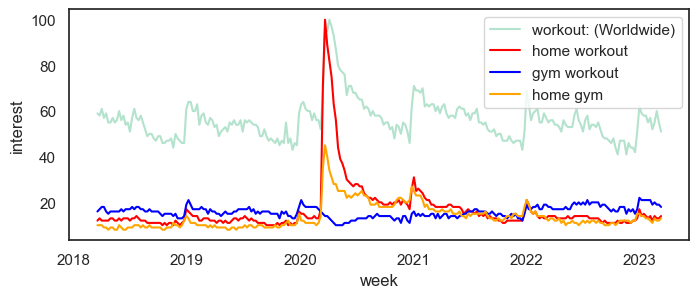

'United States'

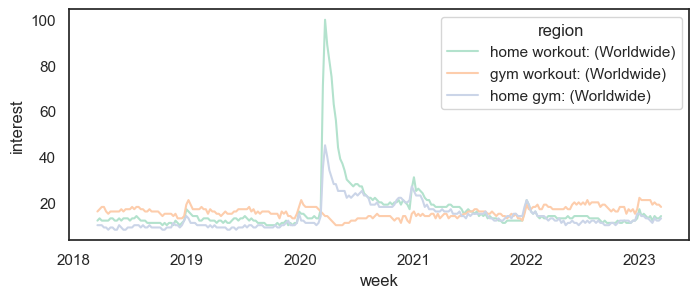

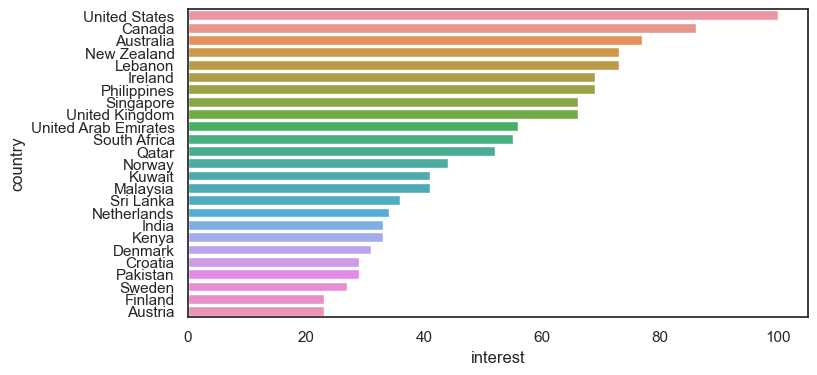

In [21]:
workout = read_file('data/workout.csv')
workout_by_month = workout.set_index('week').resample('MS').mean()
month = workout_by_month.index.strftime('%B')
workout_by_month['month'] = month
month_high = workout_by_month.loc[workout_by_month['interest'] == workout_by_month['interest'].max()]
month_str = str(month_high.index[0].date())

df = pd.read_csv('data/three_keywords.csv')
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df = df.set_index('Week')
df.index = pd.to_datetime(df.index)
df['home workout: (Worldwide)'] = df['home workout: (Worldwide)'].astype('float')
df['gym workout: (Worldwide)'] = df['gym workout: (Worldwide)'].astype('float')
df['home gym: (Worldwide)'] = df['home gym: (Worldwide)'].astype('float')
plt.plot(df.index, df[['home workout: (Worldwide)']], label = 'home workout', color='red')
plt.plot(df.index, df[['gym workout: (Worldwide)']], label = 'gym workout', color='blue')
plt.plot(df.index, df[['home gym: (Worldwide)']], label = 'home gym', color='orange')
plt.legend()
plt.show()
current = "gym workout" 
peak_covid = "home workout"

x = read_file('data/three_keywords.csv')
x

wg = read_geo('data/workout_global.csv')
top_25_countries = wg[:25].set_index('country')
top_country = top_25_countries.index[0]
top_country



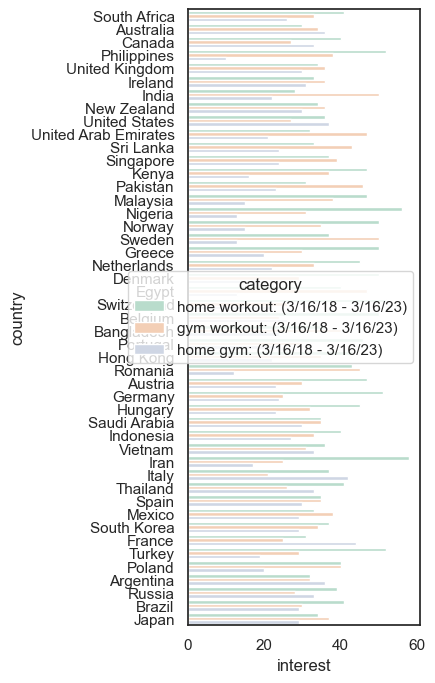

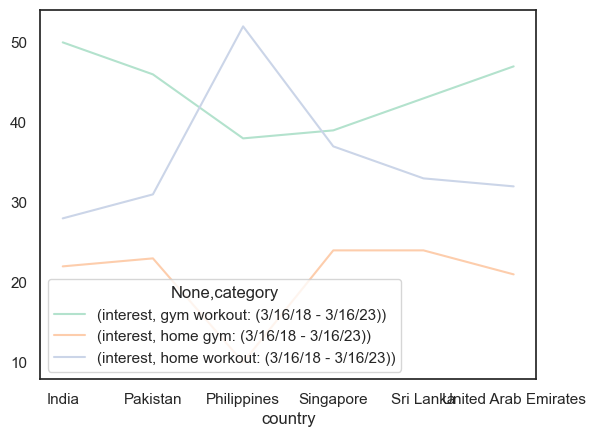

In [22]:
geo_categories = read_geo('data/geo_three_keywords.csv', multi=True)
my_list = ["Philippines", "Singapore", "United Arab Emirates", "Qatar", "Kuwait", "Lebanon," "Malaysia", "Sri Lanka", "India", "Pakistan"]
MESA = geo_categories.loc[geo_categories.country.isin(my_list), :]
MESA = MESA.set_index(['country', 'category']).unstack()
MESA.plot()
plt.show()
top_home_workout_country = 'Philippines'

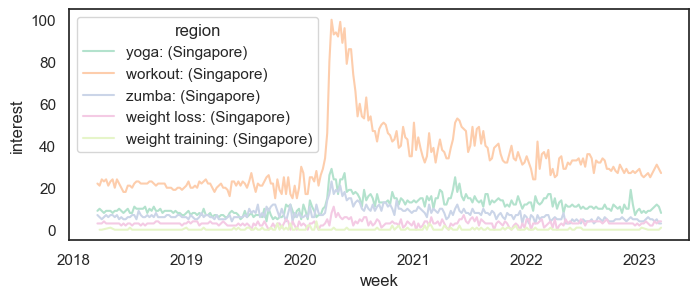

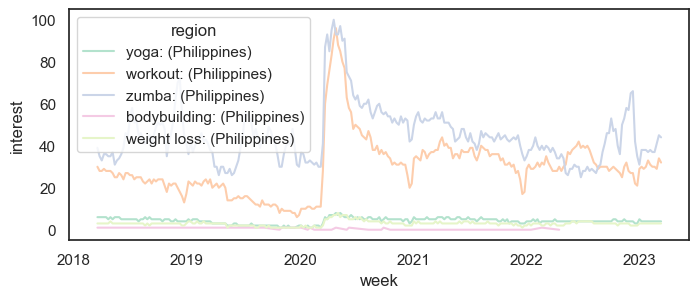

In [23]:
#data/yoga_zumba_sng.csv and data/yoga_zumba_phl.csv as sng and phl
sng = read_file('data/yoga_zumba_sng.csv')
phl = read_file('data/yoga_zumba_phl.csv')
pilot_content = ['yoga', 'zumba']